### **Importing Libraries**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split  # If you need to further split [cite: 10]
from sklearn.metrics import classification_report, confusion_matrix #For classification [cite: 10]
import tensorflow as tf  # Or torch, if you prefer PyTorch
from tensorflow.keras.datasets import fashion_mnist  # If using TensorFlow/Keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D  # Example layers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense




**Loading dataset from kreas**

In [ ]:
# Define class names (for better visualization)
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Load the Fashion-MNIST dataset from Keras
(train_images_full, train_labels_full), (test_images, test_labels) = fashion_mnist.load_data()



29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


**Sampling data for faster computation**

In [ ]:
# --- Sampling the data (as per the assignment recommendation) ---
num_samples = 10000  # Number of training samples to use.
train_images = train_images_full[:num_samples]
train_labels = train_labels_full[:num_samples]

# --- Data Inspection (as part of EDA) ---
print("Train images shape:", train_images.shape)
print("Train labels shape:", train_labels.shape)
print("Test images shape:", test_images.shape)
print("Test labels shape:", test_labels.shape)



Train images shape: (10000, 28, 28)
Train labels shape: (10000,)
Test images shape: (10000, 28, 28)
Test labels shape: (10000,)


**Visualizing the images of the classes**

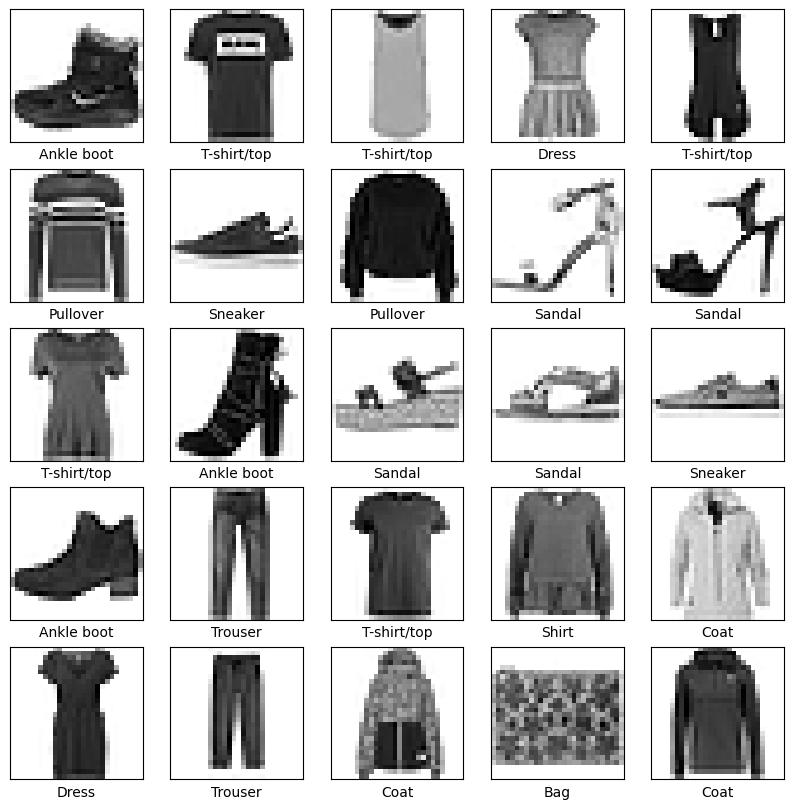

In [ ]:
# --- Visualization (first part of EDA) ---
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])  # Use class_names for labels
plt.show()




**Visualizing the counts of each class distribution**

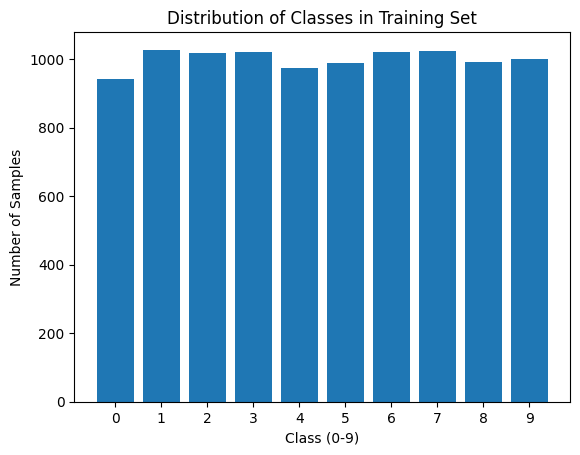

In [ ]:
# Show class distribution (example)
unique_labels, counts = np.unique(train_labels, return_counts=True)
plt.bar(unique_labels, counts)
plt.xlabel('Class (0-9)')
plt.ylabel('Number of Samples')
plt.title('Distribution of Classes in Training Set')
plt.xticks(range(10))
plt.show()


**Data preprocessing**

In [ ]:
# --- Preprocessing ---
# Normalize pixel values.  This is a recommended preprocessing step [cite: 10]
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# Reshape for CNN (add channel dimension). CNN is chosen as an appropriate model for image data.
train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)



**model selection**

In [ ]:

# Model Selection: CNN (Convolutional Neural Network)
model = Sequential([
    Input(shape=(28, 28, 1)),  # ✅ Define input shape explicitly
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')  # 10 classes
])

# Model Compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',  # Use 'categorical_crossentropy' if labels are one-hot encoded
    metrics=['accuracy']
)


 Model Training

In [ ]:
# Model Training
#Training details (hyperparameters, validation strategy). [cite: 13]
model.fit(train_images, train_labels, epochs=10, validation_split=0.2)  # Example: 10 epochs.  Validation strategy is train_test_split [cite: 10]


Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step - accuracy: 0.5798 - loss: 1.1364 - val_accuracy: 0.7700 - val_loss: 0.5725
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 9s 26ms/step - accuracy: 0.8193 - loss: 0.4945 - val_accuracy: 0.8135 - val_loss: 0.5120
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - accuracy: 0.8465 - loss: 0.4346 - val_accuracy: 0.8405 - val_loss: 0.4445
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step - accuracy: 0.8644 - loss: 0.3678 - val_accuracy: 0.8490 - val_loss: 0.4020
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - accuracy: 0.8814 - loss: 0.3441 - val_accuracy: 0.8605 - val_loss: 0.3951
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - accuracy: 0.8911 - loss: 0.3102 - val_accuracy: 0.8590 - val_loss: 0.3677
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - accuracy: 0.9019 - loss: 0.2757 - val_accuracy: 0.8635 - val_loss: 0.3709
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - accuracy: 0.9119 - loss: 0.2431 - val_

Prediction & Evaluation

In [ ]:
# --- Prediction & Evaluation ---
# Make predictions
y_pred = model.predict(test_images)
y_pred_classes = np.argmax(y_pred, axis=1)  # Get the class with the highest probability

# Evaluation:  Evaluation using Accuracy, Precision, Recall, F1-score, Confusion Matrix. [cite: 10]
print("\nEvaluation Metrics:")
print(classification_report(test_labels, y_pred_classes, target_names=class_names))  # Class-wise metrics
print("\nConfusion Matrix:")
print(confusion_matrix(test_labels, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step

Evaluation Metrics:
              precision    recall  f1-score   support

 T-shirt/top       0.74      0.89      0.81      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.75      0.83      0.79      1000
       Dress       0.93      0.83      0.88      1000
        Coat       0.66      0.91      0.76      1000
      Sandal       0.98      0.94      0.96      1000
       Shirt       0.76      0.33      0.46      1000
     Sneaker       0.92      0.96      0.94      1000
         Bag       0.97      0.96      0.97      1000
  Ankle boot       0.96      0.96      0.96      1000

    accuracy                           0.86     10000
   macro avg       0.87      0.86      0.85     10000
weighted avg       0.87      0.86      0.85     10000


Confusion Matrix:
[[894   0  34  10  10   3  42   0   7   0]
 [  7 972   2  12   5   0   0   0   2   0]
 [ 12   0 831   3 134   0  19   0   1   0]
 [ 45   9  34 832  56   0  18  

**Conclusion**

In [ ]:
# --- Conclusion (in code - for quick view) ---
print("\nModel trained and evaluated on Fashion-MNIST dataset.") #Summarize findings [cite: 15]


Model trained and evaluated on Fashion-MNIST dataset.
